In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth,association_rules
import seaborn as sn
import matplotlib.pyplot as plt
from csv import reader
groceries = []
with open('./Grocery_Items_60.csv') as file:
    csv= reader(file,delimiter='\t')
    headers = next(csv)
    for row in csv:
        items = [item for item in row[0].split(',') if item]
        groceries.append(items)
encoder = TransactionEncoder()
transactions = encoder.fit(groceries).transform(groceries)
transactions = transactions.astype(bool)
df = pd.DataFrame(transactions, columns=encoder.columns_)
frequent_itemsets = fpgrowth(df, min_support=0.01, use_colnames=True)
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
rules=association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(yogurt),(whole milk),0.084000,0.163375,0.012000,0.142857,0.874413,-0.001723,0.976062,-0.135543
1,(other vegetables),(whole milk),0.121500,0.163375,0.016000,0.131687,0.806043,-0.003850,0.963507,-0.215014
2,(rolls/buns),(whole milk),0.113250,0.163375,0.014625,0.129139,0.790446,-0.003877,0.960687,-0.230157
3,(soda),(whole milk),0.097625,0.163375,0.014125,0.144686,0.885609,-0.001824,0.978150,-0.125217


    count    msv    mct
0     529  0.001  0.050
1     309  0.001  0.075
2     190  0.001  0.100
3      63  0.005  0.050
4      43  0.005  0.075
5      26  0.005  0.100
6       8  0.010  0.050
7       7  0.010  0.075
8       4  0.010  0.100
9       0  0.050  0.050
10      0  0.050  0.075
11      0  0.050  0.100


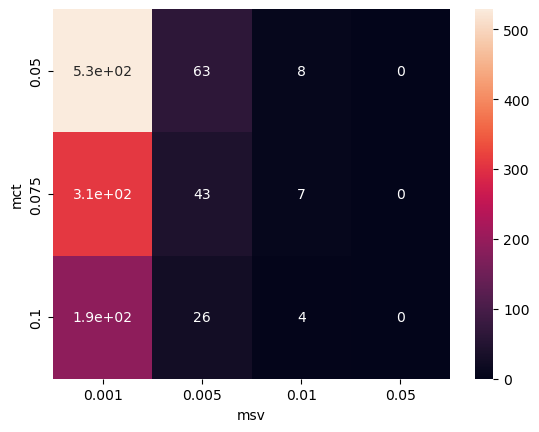

In [2]:
a = {}
for msv in (0.001, 0.005, 0.01, 0.05):
    frequent_itemsets = fpgrowth(df, min_support=msv, use_colnames=True)
    for mct in (0.05, 0.075, 0.1):
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=mct)
        a[(msv, mct)] = len(rules)
a_df = pd.DataFrame(list(a.items()), columns=['msv_mct', 'count'])
a_df[['msv', 'mct']] = pd.DataFrame(a_df['msv_mct'].tolist(), index=a_df.index)
a_df = a_df.drop(columns='msv_mct')
print(a_df)
a_df = a_df.pivot(index='mct', columns='msv', values='count')
sn.heatmap(a_df,annot=True)
plt.show()

In [3]:
frequent_itemsets = fpgrowth(df, min_support=0.005, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
max_confidence = rules['confidence'].max()
highest_confidence_rules = rules[rules['confidence'] == max_confidence]
print('The highest confidence value is: ',max_confidence)
highest_confidence_rules

The highest confidence value is:  0.16756756756756758


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
15,(bottled beer),(whole milk),0.04625,0.163375,0.00775,0.167568,1.025662,0.000194,1.005037,0.026233
